In [79]:
# 04-07_carbonhealth_and_braidhealth.csv	04-21_carbonhealth_and_braidhealth.csv
# 04-14_carbonhealth_and_braidhealth.csv


%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os 

import ipywidgets as widgets
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.stats import norm
from ipywidgets import interact, fixed
from IPython.display import display, clear_output


sns.set_style('white')
matplotlib.rcParams["figure.figsize"] = (11,9)


filepath  = '../data/'
files = os.listdir(filepath)

print(files)


['04-07_carbonhealth_and_braidhealth.csv', '04-14_carbonhealth_and_braidhealth.csv', '04-21_carbonhealth_and_braidhealth.csv']


In [2]:
datapath = '../data/04-07_carbonhealth_and_braidhealth.csv'
data_4_7 = pd.read_csv(datapath)

data_4_7.describe()

,age,temperature,pulse,sys,dia,rr,sats,days_since_symptom_onset
count,922.000000,879.000000,891.000000,889.000000,889.000000,719.000000,883.000000,490.000000
mean,39.997831,36.939363,83.507295,127.241845,80.628796,15.432545,98.007928,7.324490
std,14.956252,0.390262,14.865642,16.023596,9.911858,2.275728,1.473479,8.652742
min,2.000000,35.650000,48.000000,83.000000,47.000000,11.000000,91.000000,1.000000
25%,30.000000,36.750000,73.000000,116.000000,75.000000,14.000000,97.000000,3.000000
50%,37.000000,36.900000,82.000000,126.000000,80.000000,16.000000,98.000000,5.000000
75%,48.000000,37.150000,93.000000,136.000000,86.000000,17.000000,99.000000,7.000000
max,90.000000,39.350000,165.000000,205.000000,135.000000,28.000000,100.000000,90.000000


In [3]:
datapath = '../data/04-21_carbonhealth_and_braidhealth.csv'
data_4_21 = pd.read_csv(datapath)

data_4_21.describe()

,age,temperature,pulse,sys,dia,rr,sats,days_since_symptom_onset
count,322.000000,311.000000,273.000000,273.000000,273.000000,245.000000,269.000000,126.000000
mean,42.118012,36.940193,84.413919,126.542125,78.827839,15.848980,97.858736,9.880952
std,15.240289,0.330115,13.459666,17.257752,10.564387,1.976721,1.519318,16.770740
min,4.000000,36.250000,54.000000,81.000000,43.000000,12.000000,93.000000,1.000000
25%,30.000000,36.725000,75.000000,114.000000,72.000000,15.000000,97.000000,2.000000
50%,40.500000,36.900000,82.000000,125.000000,80.000000,16.000000,98.000000,5.000000
75%,52.000000,37.100000,92.000000,137.000000,85.000000,17.000000,99.000000,9.250000
max,85.000000,38.350000,140.000000,190.000000,108.000000,25.000000,100.000000,120.000000


In [4]:
datapath = '../data/04-14_carbonhealth_and_braidhealth.csv'
data_4_14 = pd.read_csv(datapath)

data_4_14.describe()

,age,temperature,pulse,sys,dia,rr,sats,days_since_symptom_onset
count,367.000000,344.000000,348.000000,352.000000,352.000000,308.000000,342.000000,195.000000
mean,40.880109,36.940262,82.859195,126.977273,80.235795,15.581169,97.789474,10.066667
std,15.668067,0.337500,15.591332,16.676904,9.564808,1.910856,1.515165,16.654793
min,0.000000,35.850000,48.000000,87.000000,49.000000,12.000000,94.000000,1.000000
25%,29.000000,36.750000,71.000000,115.750000,74.000000,15.000000,97.000000,3.000000
50%,38.000000,36.900000,81.000000,126.000000,80.000000,16.000000,98.000000,5.000000
75%,52.000000,37.100000,95.000000,137.000000,86.000000,17.000000,99.000000,14.000000
max,82.000000,38.700000,135.000000,180.000000,106.000000,26.000000,100.000000,150.000000


In [24]:
data_merged = pd.concat([data_4_7, data_4_14, data_4_21])

data_merged_null = data_merged.copy()
data_merged.shape
data_merged.head()

data_merged = data_merged.fillna('Not_Measured')
data_merged.date_published.value_counts()

data_merged.head()



,date_published,clinic_state,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,...,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_link,er_referral
0,2020-04-07,CA,SARS CoV w/CoV 2 RNA,Nasopharyngeal,Negative,36,True,Not_Measured,False,False,...,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,False
1,2020-04-07,CA,SARS CoV w/CoV 2 RNA,Nasopharyngeal,Negative,35,False,Not_Measured,False,False,...,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,False
2,2020-04-07,CA,SARS COV 2 RNA RTPCR,Oropharyngeal,Negative,18,True,Not_Measured,False,False,...,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,False
3,2020-04-07,CA,SARS CoV w/CoV 2 RNA,Nasopharyngeal,Negative,46,Not_Measured,Not_Measured,False,False,...,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,False
4,2020-04-07,CA,SARS COV 2 RNA RTPCR,Nasopharyngeal,Negative,29,Not_Measured,Not_Measured,False,False,...,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,Not_Measured,False


In [14]:

col_name = ['clinic_state', 'test_name', 'swab_type' , 'covid19_test_results' ,'covid19_test_results' , 'high_risk_exposure_occupation'  ,
       'high_risk_interactions' , 'diabetes', 'chd', 'htn', 'cancer', 'asthma',
       'copd', 'autoimmune_dis',  'rapid_flu_results', 'rapid_strep_results',
        'ctab', 'labored_respiration', 'rhonchi',
       'wheezes', 'cough', 'cough_severity', 'fever', 'sob', 'sob_severity',
       'diarrhea', 'fatigue', 'headache', 'loss_of_smell', 'loss_of_taste',
       'runny_nose', 'muscle_sore', 'sore_throat', 'er_referral']


def unique_dates(data):
    counts = data.date_published.unique().tolist()
    counts.sort()
    counts.insert(0, 'ALL')
    return counts


@interact(col_name=col_name , data=fixed(data_merged))
def plot_categorical_counts(col_name, data, percentage=True, dates=unique_dates(data_merged)):
    
    if dates == '2020-04-21':
        data = data[data.date_published == '2020-04-21']
    elif dates == '2020-04-07':
        data = data[data.date_published == '2020-04-07']
    elif dates == '2020-04-14':
        data = data[data.date_published == '2020-04-14']

    plot_data = pd.DataFrame(data[col_name] \
        .value_counts()) \
        .reset_index()
    
    plot_data.columns = [col_name, 'count']
    plot_data['percentage'] = (plot_data['count'] / data.shape[0])

    fig = plt.figure()
    ax = fig.add_subplot()
    
    if percentage:
        y_col = "percentage"
    else:
        y_col = "count"
        
    ax = sns.barplot(y=y_col, x=col_name, data=plot_data, ax=ax)
    ax.tick_params(axis='x', labelsize=14, labelrotation=70)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xlabel(col_name, fontsize=18)
    ax.set_ylabel('percentage', fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=70)

    sns.despine(offset=10, trim=False, ax=ax)
    plt.tight_layout()
    return ax, fig


interactive(children=(Dropdown(description='col_name', options=('clinic_state', 'test_name', 'swab_type', 'cov…

In [15]:

symptoms = [ 'high_risk_exposure_occupation'  ,
       'high_risk_interactions' , 'diabetes', 'chd', 'htn', 'cancer', 'asthma',
       'copd', 'autoimmune_dis',
        'ctab', 'labored_respiration', 'rhonchi',
       'wheezes', 'cough', 'fever', 'sob',
       'diarrhea', 'fatigue', 'headache', 'loss_of_smell', 'loss_of_taste',
       'runny_nose', 'muscle_sore', 'sore_throat', 'er_referral']

col_names =[ 'High risk exposure occupation'  ,
       'High risk interactions' , 'Diabetes', 'Coronary heart disease', 'Hypertension', 'Cancer', 'Asthma',
       'copd', 'autoimmune_dis',
        'Chronic obstructive pulmonary disease', 'Labored respiration', 'rhonchi',
       'Wheezes', 'Cough', 'Fever', 'Sob',
       'Diarrhea', 'Fatigue', 'Headache', 'Loss of smell', 'Loss of taste',
       'Runny nose', 'Muscle sore', 'Sore throat', 'Referral']

@interact(symptom=fixed(symptoms), data=fixed(data_merged))
def barplot_symptoms(symptom, data, Date=unique_dates(data_merged)):
    
    if Date == '2020-04-21':
        data = data[data.date_published == '2020-04-21']
    elif Date == '2020-04-07':
        data = data[data.date_published == '2020-04-07']
    elif Date == '2020-04-14':
        data = data[data.date_published == '2020-04-14']

    data_cnt = data[symptoms].apply(lambda x: x.value_counts()).transpose().sort_values([False, 'Not_Measured', True])
    
    data_cnt.plot(kind='bar', stacked=True, \
                  title='Symptoms in Covid19 pacients',\
                  color=['blue', 'orange', 'green'], \
                  fontsize=14)


interactive(children=(Dropdown(description='Date', options=('ALL', '2020-04-07', '2020-04-14', '2020-04-21'), …

In [17]:
fields_numerical = ['temperature', 'age', 'pulse', 'sys', 'dia', 'rr', 'sats','days_since_symptom_onset']

plt.rcParams["axes.labelsize"] = 15


@interact(col_name=fields_numerical , data=fixed(data_merged))
def hist_numerical(col_name, data, \
                   Test_results=['Positive', 'Negative', 'ALL'], \
                  Date=unique_dates(data_merged)):
    
    plot_data = data_merged.copy()
    
    if Date == '2020-04-21':
        plot_data = plot_data[plot_data.date_published == '2020-04-21']
    elif Date == '2020-04-07':
        plot_data = plot_data[plot_data.date_published == '2020-04-07']
    elif Date == '2020-04-14':
        plot_data = plot_data[plot_data.date_published == '2020-04-14']

    
    plot_data[col_name] = plot_data[col_name].replace('Not_Measured', -1)
    plot_data = plot_data[plot_data[col_name] > 0]
    
    if Test_results == 'Positive':
        plot_data = plot_data[plot_data.covid19_test_results == 'Positive']
    
    elif Test_results == 'Negative':
        plot_data = plot_data[plot_data.covid19_test_results == 'Negative']
        

    fig = plt.figure(constrained_layout=True)
    gs = gridspec.GridSpec(nrows=1, ncols=3, figure=fig)

    ax_00 = fig.add_subplot(gs[0, 0])
    ax_hist =  sns.distplot(plot_data[col_name], ax = ax_00)   
    ax_hist.set(xlabel='Histogram w/ fitted dist')

    ax_01 = fig.add_subplot(gs[0, 1])
    ax_hist_rug = sns.distplot(plot_data[col_name], rug=True, hist=False, ax = ax_01)   
    ax_hist_rug.set(xlabel='Histogram w/ rug')


    ax_02 = fig.add_subplot(gs[0,2])
    ax_hist_fitnorm = sns.distplot(plot_data[col_name], fit=norm, kde=False, ax = ax_02)   
    ax_hist_fitnorm.set(xlabel='Histogram w/ fitted normal dist')

    sns.despine(offset=10, trim=False)


interactive(children=(Dropdown(description='col_name', options=('temperature', 'age', 'pulse', 'sys', 'dia', '…

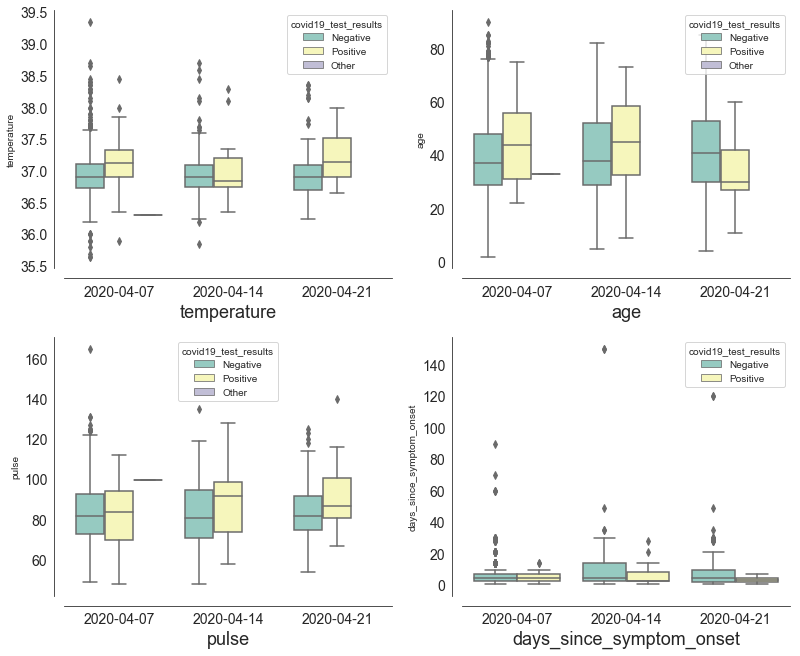

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

In [321]:
fields_numerical = ['temperature', 'age', 'pulse','days_since_symptom_onset']


def boxplot_numerical(col_name, data, ax):
    
    plot_data = data.copy()
    
    plot_data[col_name] = plot_data[col_name].replace('Not_Measured', -1)
    plot_data = plot_data[plot_data[col_name] > 0]
    
    fig = plt.figure()

    if not ax:
        ax = fig.add_subplot()
    
    ax = sns.boxplot(x="date_published", 
                     y=col_name, 
                     hue="covid19_test_results", 
                     data=plot_data, 
                     palette="Set3", 
                     ax=ax)
    
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xlabel(col_name, fontsize=18)

    sns.despine(offset=10, trim=False, ax=ax)
    plt.tight_layout()
    return ax, fig


fig = plt.figure(constrained_layout=True)
gs = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

ax_00 = fig.add_subplot(gs[0, 0])
ax_00, _ = boxplot_numerical(fields_numerical[0], data_merged, ax_00)

ax_01 = fig.add_subplot(gs[0, 1])
ax_01, _ = boxplot_numerical(fields_numerical[1], data_merged, ax_01)

ax_10 = fig.add_subplot(gs[1,0])
ax_10, _ = boxplot_numerical(fields_numerical[2], data_merged, ax_10)

ax_11 = fig.add_subplot(gs[1,1])
ax_11, _ = boxplot_numerical(fields_numerical[3], data_merged, ax_11)


# Feature importance analysis

In [92]:
from sklearn.ensemble import RandomForestClassifier 

Y = data_merged_null.covid19_test_results
X = data_merged_null[[ 'high_risk_exposure_occupation',
       'high_risk_interactions', 'diabetes', 'chd', 'htn', 'cancer', 'asthma',
       'copd', 'autoimmune_dis', 'temperature', 'pulse', 'sys', 'dia', 'rr',
       'sats', 'rapid_flu_results', 'rapid_strep_results',
       'days_since_symptom_onset', 'ctab', 'labored_respiration', 'rhonchi',
       'wheezes', 'cough', 'fever', 'sob',
       'diarrhea', 'fatigue', 'headache', 'loss_of_smell', 'loss_of_taste',
       'runny_nose', 'muscle_sore', 'sore_throat']]


# bool
X['high_risk_exposure_occupation'] = X['high_risk_exposure_occupation'].astype('bool')
X['high_risk_interactions'] = X['high_risk_interactions'].astype('bool')
X['rapid_flu_results'] = X['rapid_flu_results'].astype('bool')
X['rapid_strep_results'] = X['rapid_strep_results'].astype('bool')
X['ctab'] = X['ctab'].astype('bool')
X['labored_respiration'] = X['labored_respiration'].astype('bool')
X['rhonchi'] = X['rhonchi'].astype('bool')
X['wheezes'] = X['wheezes'].astype('bool')
X['cough'] = X['cough'].astype('bool')
X['fever'] = X['fever'].astype('bool')
X['sob'] = X['sob'].astype('bool')
X['diarrhea'] = X['diarrhea'].astype('bool')
X['fatigue'] = X['fatigue'].astype('bool')
X['headache'] = X['headache'].astype('bool')
X['loss_of_smell'] = X['loss_of_smell'].astype('bool')
X['loss_of_taste'] = X['loss_of_taste'].astype('bool')
X['runny_nose'] = X['runny_nose'].astype('bool')
X['muscle_sore'] = X['muscle_sore'].astype('bool')
X['sore_throat'] = X['sore_throat'].astype('bool')


print(data_merged_null['cough_severity'].value_counts())



/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

Mild        344
Moderate    325
Severe       40
Name: cough_severity, dtype: int64


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [95]:
from sklearn import preprocessing


groups = ["{0}-{1}".format(i, i+9) for i in range(0,100,10)]
data_merged_null['age_group'] = pd.cut(data_merged_null['age'], range(0,110,10), right=False, labels=groups)




# categorical_vars
data_merged_null['test_name'] = data_merged_null['test_name'].astype('category')
data_merged_null['swab_type'] = data_merged_null['swab_type'].astype('category')
data_merged_null['cough_severity'] = data_merged_null['cough_severity'].astype('category')
data_merged_null['sob_severity'] = data_merged_null['sob_severity'].astype('category')
data_merged_null['age'] = data_merged_null['age'].astype('category')
data_merged_null['age_group'] = data_merged_null['age_group'].astype('category')

# test_name
le_test_name  = preprocessing.LabelEncoder()
X_test_name =  le_test_name.fit_transform(data_merged_null['test_name'])
X['test_name'] = X_test_name

# swab_type
le_swab_type  = preprocessing.LabelEncoder()
X_swab_type =  le_swab_type.fit_transform(data_merged_null['swab_type'])
X['swab_type'] = X_swab_type

# # cough_severity
# le_cough_severity  = preprocessing.LabelEncoder()
# X_cough_severity =  le_cough_severity.fit_transform(data_merged_null['cough_severity'])
# X['cough_severity'] = X_cough_severity

# # sob_severity
# le_sob_severity  = preprocessing.LabelEncoder()
# X_sob_severity =  le_sob_severity.fit_transform(data_merged_null['sob_severity'])
# X['sob_severity'] = X_sob_severity

# age
le_age  = preprocessing.LabelEncoder()
X_age =  le_age.fit_transform(data_merged_null['age'])
X['age'] = X_age

# age_group
le_age_group  = preprocessing.LabelEncoder()
X_age_group =  le_age_group.fit_transform(data_merged_null['age_group'])
X['age_group'] = X_age_group


# print(data_merged_null.dtypes)



X.head()


# print(len(le_test_name.inverse_transform(X_test_name)))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,asthma,copd,autoimmune_dis,temperature,...,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,test_name,swab_type,age,age_group
0,True,True,False,False,False,False,False,False,False,36.75,...,True,True,True,True,True,True,3,1,32,3
1,False,True,False,False,False,False,False,False,False,37.25,...,True,True,True,True,True,True,3,1,31,3
2,True,True,False,False,False,False,False,False,False,37.10,...,True,True,True,True,True,True,1,2,14,1
3,True,True,False,False,False,False,False,False,False,37.25,...,True,True,True,True,True,True,3,1,42,4
4,True,True,False,False,False,False,False,False,False,36.70,...,True,True,True,True,True,True,1,1,25,2


In [96]:



model = RandomForestClassifier().fit(X,Y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').